In [1]:
import pickle
from gensim.models import word2vec, Word2Vec
import multiprocessing
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import pandas as pd
import pickle
import requests
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import random
from scipy.spatial.distance import cosine
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# from chembl_webresource_client.new_client import new_client
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Layer, Dense, Conv1D, Flatten, Reshape, GRU, SpatialDropout1D, LSTM, Dropout, RepeatVector
from keras.layers import BatchNormalization, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.manifold.t_sne import _joint_probabilities
from scipy import linalg
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import squareform
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KDTree
from sklearn.svm import SVC

from nltk.tokenize import sent_tokenize, word_tokenize
from keras.preprocessing.text import Tokenizer,text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from keras.optimizers import adam
from keras import backend as K
from keras.models import Model
from keras import initializers
from keras.engine.topology import Layer
from keras.layers import Dense, Input
from keras.layers import Embedding, GRU, Bidirectional, TimeDistributed
from tensorflow.python.ops.rnn import bidirectional_dynamic_rnn
import nltk
nltk.download('punkt')

%matplotlib inline

/Users/dweepa/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
[nltk_data] Downloading package punkt to /Users/dweepa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
dimensions = 200

In [3]:
from keras.preprocessing.sequence import skipgrams
from keras.preprocessing import text

In [4]:
with open("./data/mol_sentences.pkl", "rb") as file:
    sentences = pickle.load(file)
    
atc = [sentence[1][0] for sentence in sentences]
sentences = [sentence[3] for sentence in sentences]

In [5]:
tokenizer = text.Tokenizer()
tokenizer.fit_on_texts(sentences)
print("Word Index: ",tokenizer.word_index)

Word Index:  {'3218693969': 1, '3217380708': 2, '951226070': 3, '2245384272': 4, '2968968094': 5, '2246728737': 6, '864942730': 7, '2976033787': 8, '98513984': 9, '864662311': 10, '2246699815': 11, '1510328189': 12, '864674487': 13, '2092489639': 14, '2245273601': 15, '994485099': 16, '10565946': 17, '2041434490': 18, '2117068077': 19, '2803848648': 20, '847961216': 21, '2976816164': 22, '1510461303': 23, '3542456614': 24, '3189457552': 25, '3537119515': 26, '847957139': 27, '1533864325': 28, '2142032900': 29, '1861965050': 30, '266675433': 31, '882399112': 32, '2132511834': 33, '1016841875': 34, '3975275337': 35, '26234434': 36, '2119439498': 37, '2228063684': 38, '848128881': 39, '2246703798': 40, '3452535345': 41, '3818546315': 42, '422715066': 43, '1276993226': 44, '1542633699': 45, '517457164': 46, '864942795': 47, '3537123720': 48, '4121755354': 49, '1135286194': 50, '2245277810': 51, '1535166686': 52, '2076190208': 53, '4008337421': 54, '1100037548': 55, '3351556771': 56, '11019

In [6]:
word2id = tokenizer.word_index
id2word = {v:k for k, v in word2id.items()}

vocab_size = len(word2id) + 1 
embed_size = dimensions
wids = [[word2id[w] for w in doc] for doc in sentences]
print('Vocabulary Size:', vocab_size)
print('Vocabulary Sample:', list(word2id.items())[:10])

Vocabulary Size: 2825
Vocabulary Sample: [('3218693969', 1), ('3217380708', 2), ('951226070', 3), ('2245384272', 4), ('2968968094', 5), ('2246728737', 6), ('864942730', 7), ('2976033787', 8), ('98513984', 9), ('864662311', 10)]


In [7]:
skip_grams = [skipgrams(wid, vocabulary_size=vocab_size, window_size=10) for wid in wids]

# view sample skip-grams
pairs, labels = skip_grams[0][0], skip_grams[0][1]
for i in range(10):
    print("({:s} ({:d}), {:s} ({:d})) -> {:d}".format(
          id2word[pairs[i][0]], pairs[i][0], 
          id2word[pairs[i][1]], pairs[i][1], 
          labels[i]))

(4222851645 (93), 2351145560 (2185)) -> 0
(3217380708 (2), 2510215966 (297)) -> 0
(3320199913 (975), 3974116184 (1311)) -> 0
(1535166686 (52), 864662311 (10)) -> 0
(584893129 (414), 2192318254 (178)) -> 0
(847961216 (21), 2968968094 (5)) -> 1
(3585958780 (810), 1683958275 (956)) -> 0
(2246728737 (6), 4223486634 (2399)) -> 0
(2246699815 (11), 1535166686 (52)) -> 1
(3537123720 (48), 1774142290 (1638)) -> 0


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1, 200)       565000      input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 200, 1)       0           embedding[0][0]                  
__________

/Users/dweepa/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("de...)`


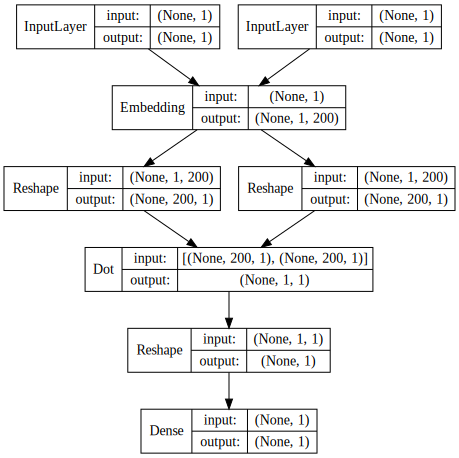

In [8]:
from keras.layers.core import Dense, Reshape
from keras.layers.merge import dot
from keras.layers.embeddings import Embedding
from keras.models import Sequential

input_target = Input((1,))
input_context = Input((1,))

embedding = Embedding(vocab_size, embed_size, input_length=1, name='embedding')
word_embedding = embedding(input_target)
word_embedding = Reshape((embed_size, 1))(word_embedding)

context_embedding = embedding(input_context)
context_embedding = Reshape((embed_size, 1))(context_embedding)

# now perform the dot product operation  
dot_product = dot([word_embedding, context_embedding], axes=1)
dot_product = Reshape((1,))(dot_product)

# add the sigmoid output layer
output = Dense(1, activation='sigmoid')(dot_product)

model = Model(input=[input_target, input_context], output=output)
model.compile(loss='mean_squared_error', optimizer='rmsprop')

# view model summary
print(model.summary())

# visualize model structure
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True, show_layer_names=False, 
                 rankdir='TB').create(prog='dot', format='svg'))

In [9]:
for epoch in range(1, 6):
    loss = 0
    for i, elem in enumerate(skip_grams):
        try:
            pair_first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
            pair_second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32')
            labels = np.array(elem[1], dtype='int32')
            X = [pair_first_elem, pair_second_elem]
            Y = labels
            if i % 100 == 0:
                print('Processed {} (skip_first, skip_second, relevance) pairs'.format(i))
            loss += model.train_on_batch(X,Y)  
        except:
            break
    print('Epoch:', epoch, 'Loss:', loss)

Processed 0 (skip_first, skip_second, relevance) pairs
Processed 100 (skip_first, skip_second, relevance) pairs
Processed 200 (skip_first, skip_second, relevance) pairs
Processed 300 (skip_first, skip_second, relevance) pairs
Processed 400 (skip_first, skip_second, relevance) pairs
Processed 500 (skip_first, skip_second, relevance) pairs
Processed 600 (skip_first, skip_second, relevance) pairs
Processed 700 (skip_first, skip_second, relevance) pairs
Processed 800 (skip_first, skip_second, relevance) pairs
Processed 900 (skip_first, skip_second, relevance) pairs
Processed 1000 (skip_first, skip_second, relevance) pairs
Epoch: 1 Loss: 238.8549446463585
Processed 0 (skip_first, skip_second, relevance) pairs
Processed 100 (skip_first, skip_second, relevance) pairs
Processed 200 (skip_first, skip_second, relevance) pairs
Processed 300 (skip_first, skip_second, relevance) pairs
Processed 400 (skip_first, skip_second, relevance) pairs
Processed 500 (skip_first, skip_second, relevance) pairs
P

In [10]:
word_embed_layer = model.layers[2]
weights = word_embed_layer.get_weights()[0][1:]

print(weights.shape)
pd.DataFrame(weights, index=id2word.values()).head()

(2824, 200)


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
3218693969,-0.007815,0.025655,-0.054418,0.047707,-0.053304,-0.032344,-0.038092,-0.003475,0.042399,0.054148,...,-0.065047,-0.028317,-0.067731,0.066937,0.068481,0.022215,0.002880,-0.048244,0.029590,0.064462
3217380708,-0.037539,-0.018423,-0.054471,0.002065,-0.150922,-0.051723,-0.010238,-0.016380,-0.016109,-0.053366,...,-0.055817,0.042082,-0.027176,-0.013092,0.073343,0.049185,-0.074596,0.016055,0.009902,0.009771
951226070,-0.014407,0.017348,-0.076627,-0.079850,-0.125047,-0.020330,-0.060282,0.024812,0.055587,0.007421,...,-0.090185,0.066644,-0.054657,0.080414,0.040861,0.024305,-0.010457,-0.022095,0.003394,0.037271
2245384272,-0.027339,-0.078033,-0.016628,0.030861,0.041375,-0.089075,-0.028433,-0.104020,-0.019277,0.011969,...,0.100087,-0.101099,-0.062196,0.040211,0.049866,0.001087,0.043342,-0.018108,0.051299,-0.085588
2968968094,0.009705,0.078357,0.025828,0.023249,-0.110879,-0.034863,-0.008373,-0.044480,-0.017675,-0.103963,...,-0.049412,-0.046741,-0.048408,-0.021562,0.016362,0.032910,0.155617,-0.016007,0.040589,-0.068971


In [11]:
from sklearn.metrics.pairwise import euclidean_distances

distance_matrix = euclidean_distances(weights)
print(distance_matrix.shape)

similar_words = {search_term: [id2word[idx] for idx in distance_matrix[word2id[search_term]-1].argsort()[1:6]+1] 
                   for search_term in ['2246728737','3537119515','2245273601','2423543607']}

similar_words

(2824, 2824)


/Users/dweepa/anaconda/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


{'2245273601': ['3982076256',
  '1228528465',
  '3537123720',
  '98513984',
  '3818546315'],
 '2246728737': ['2142032900',
  '3776905034',
  '2424973678',
  '2297887526',
  '2591432844'],
 '2423543607': ['3824347764',
  '2258843522',
  '3345225135',
  '1506563592',
  '54936104'],
 '3537119515': ['1510461303',
  '3218693969',
  '2245384272',
  '98513984',
  '2142032900']}

Total words: 24 	Word Embedding shapes: (24, 200)


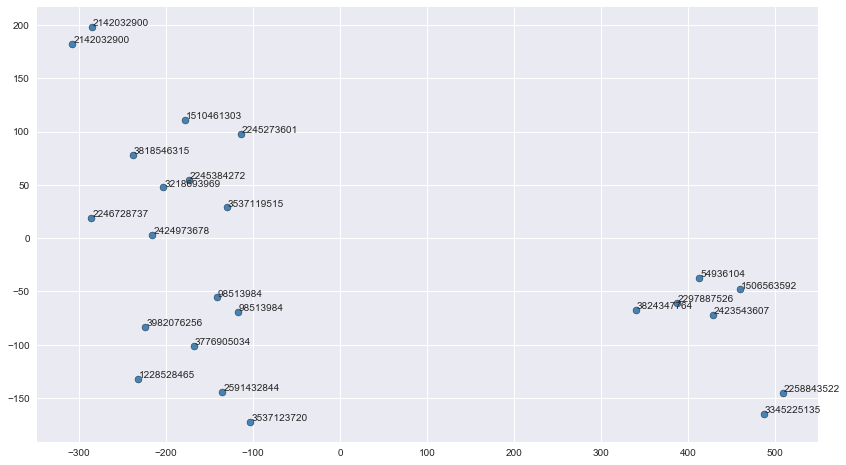

In [12]:
from sklearn.manifold import TSNE

words = sum([[k] + v for k, v in similar_words.items()], [])
words_ids = [word2id[w] for w in words]
word_vectors = np.array([weights[idx] for idx in words_ids])
print('Total words:', len(words), '\tWord Embedding shapes:', word_vectors.shape)

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=3)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(word_vectors)
labels = words

plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1], c='steelblue', edgecolors='k')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

In [13]:
def getVectors(words, word2id):
    words_ids = [word2id[w]-1 for w in words]
    word_vectors = sum(np.array([weights[idx] for idx in words_ids]))
    return word_vectors

# Vectorization

In [14]:
sum_vectors = []
for sentence in sentences:
    vector = getVectors(sentence, word2id)
    sum_vectors.append(vector)
    
sum_vectors = np.asarray(sum_vectors)

In [15]:
print(sum_vectors.shape)
le = LabelEncoder()
le.fit(atc)
atc = le.transform(atc)

(2731, 200)


## Data Preparation

In [16]:
X = sum_vectors
y = atc

atc_counter = Counter(y)
top_atc = [a for a, _ in atc_counter.most_common(14)]

temp_x = []
temp_y = []

for i in range(y.shape[0]):
    if y[i] in top_atc:
        temp_x.append(X[i])
        temp_y.append(y[i])
        
X = np.asarray(temp_x)
y = np.asarray(temp_y)

atc_labels = le.inverse_transform(np.unique(y))

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=int(random.random()*100))

## Helper Functions

In [18]:
def accuracy(y_true, y_pred, atc_labels=atc_labels):
    print("Overall Accuracy:", np.sum(np.equal(y_true, y_pred))/y_true.shape[0])
    matrix = confusion_matrix(y_true, y_pred)
    print(classification_report(y_true, y_pred))
    plt.figure(figsize=(10, 10))
    sns.heatmap(matrix, annot=True,cbar=False, xticklabels=atc_labels, yticklabels=atc_labels)

# Bi-RNN

In [35]:
class HierarchicalAttentionNetwork(Layer):
    def __init__(self, attention_dim):
        self.init = initializers.get('normal')
        self.supports_masking = True
        self.attention_dim = attention_dim
        super(HierarchicalAttentionNetwork, self).__init__()

    def build(self, input_shape):
        assert len(input_shape) == 3
        self.W = K.variable(self.init((input_shape[-1], self.attention_dim)))
        self.b = K.variable(self.init((self.attention_dim,)))
        self.u = K.variable(self.init((self.attention_dim, 1)))
        self.trainable_weights = [self.W, self.b, self.u]
        super(HierarchicalAttentionNetwork, self).build(input_shape)

    def compute_mask(self, inputs, mask=None):
        return mask

    def call(self, x, mask=None):
        # size of x :[batch_size, sel_len, attention_dim]
        # size of u :[batch_size, attention_dim]
        # uit = tanh(xW+b)
        uit = K.tanh(K.bias_add(K.dot(x, self.W), self.b))

        ait = K.exp(K.squeeze(K.dot(uit, self.u), -1))

        if mask is not None:
            # Cast the mask to floatX to avoid float64 upcasting
            ait *= K.cast(mask, K.floatx())
        ait /= K.cast(K.sum(ait, axis=1, keepdims=True) + K.epsilon(), K.floatx())
        weighted_input = x * K.expand_dims(ait)
        output = K.sum(weighted_input, axis=1)

        return output

    def compute_output_shape(self, input_shape):
        return input_shape[0], input_shape[-1]
    
def BiRNNModelAttention(input_shape, output_shape):
    review_input = Input(shape=(input_shape, 1), dtype='float32')
    lstm_sentence = Bidirectional(GRU(200, return_sequences=True))(review_input)
    attn_sentence = HierarchicalAttentionNetwork(200)(lstm_sentence)
    preds = Dense(output_shape, activation='softmax')(attn_sentence)
    model = Model(review_input, preds)
    opt = adam(lr=0.0001)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['acc'])
    return model

In [36]:
model = BiRNNModelAttention(dimensions,14)

In [37]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 200, 1)            0         
_________________________________________________________________
bidirectional_4 (Bidirection (None, 200, 400)          242400    
_________________________________________________________________
hierarchical_attention_netwo (None, 400)               80400     
_________________________________________________________________
dense_5 (Dense)              (None, 14)                5614      
Total params: 328,414
Trainable params: 328,414
Non-trainable params: 0
_________________________________________________________________


In [38]:
oeAtc = OneHotEncoder(sparse=False)
oeAtc.fit(y.reshape(-1, 1))
y_onehot = oeAtc.transform(y.reshape(-1, 1))
vec = sum_vectors.reshape(len(sum_vectors),dimensions,1)
X_train, X_test, y_onehot_train, y_onehot_test = train_test_split(vec, y_onehot, test_size=0.3, random_state=int(random.random()*100))

/Users/dweepa/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [39]:
model.fit(X_train, y_onehot_train, epochs=50)

Epoch 1/50
1911/1911 [==============================] - 37s 19ms/step - loss: 2.5772 - acc: 0.1156
Epoch 2/50
1911/1911 [==============================] - 42s 22ms/step - loss: 2.5166 - acc: 0.2025
Epoch 3/50
1911/1911 [==============================] - 46s 24ms/step - loss: 2.4789 - acc: 0.2130
Epoch 4/50
1911/1911 [==============================] - 36s 19ms/step - loss: 2.4392 - acc: 0.2077
Epoch 5/50
1911/1911 [==============================] - 34s 18ms/step - loss: 2.4049 - acc: 0.2156
Epoch 6/50
1911/1911 [==============================] - 34s 18ms/step - loss: 2.3885 - acc: 0.2214
Epoch 7/50
1911/1911 [==============================] - 31s 16ms/step - loss: 2.3820 - acc: 0.2172
Epoch 8/50
1911/1911 [==============================] - 34s 18ms/step - loss: 2.3815 - acc: 0.2198
Epoch 9/50
1911/1911 [==============================] - 36s 19ms/step - loss: 2.3799 - acc: 0.2208
Epoch 10/50
1911/1911 [==============================] - 44s 23ms/step - loss: 2.3767 - acc: 0.2240
Epoch 11/

In [ ]:
y_pred = model.predict(X_test).argmax(axis=1)
y_true = y_onehot_test.argmax(axis=1)
accuracy(y_true, y_pred, atc_labels)